# LABORATORIO 3 - Práctica 1: CNN con Keras para clasificar imágenes de Rayos X de neumonía
---
<img src="ufv.png" width="100px" height="100px"></img> 
### Integrantes: 
* Julián Prieto Velasco   
* Guillermo Ramírez Cárdenas
* Pedro Paniagua Falo     
* Javier Muñoz Rojas

---

## **Índice**
1. [Introducción](#id0)
1. [Pneumonia vs Normal](#id1)
* [Preprocesamiento](#id11)
* [Arquitectura de la red y entrenamiento](#id12)
* [Evaluación y predicción](#id13)

3. [Pneumonia vírica vs Pneumonia bacteriana vs Normal](#id2)
* [Preprocesamiento](#id21)
* [Arquitectura de la red y entrenamiento](#id22)
* [Evaluación y predicción](#id23)

---

<div id='id0'>

## *Introducción*
---
Analiza el dataset de radiografías torácicas Chest X-Chest X-Ray Images (Pneumonia). El dataset contiene 3 carpetas  (train,test,val)  y  por  cada  carpeta  hay  dos  etiquetas  (Pneumonia/Normal).  Dentro  de  la  carpeta  Pneumonia se distingue entre bacteriana y vírica.

---

### Importar Librerías

---

In [2]:
from PIL import Image
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
from tensorflow.keras import optimizers,layers
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from IPython.display import Image
from PIL import Image
import itertools
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD

<div id='id1'>

## *1-PNEUMONIA VS NORMAL*
---


<div id='id11'>

### *1.1 - Preprocesamiento*

Prepara los datos de entrada (puede que no haya suficientes) y divídelos en los datasets necesarios.

In [10]:
# Directorios de entrenamiento, validación y prueba
train_dir = 'archive/chest_xray/train'
val_dir = 'archive/chest_xray/val'
test_dir = 'archive/chest_xray/test'

# Altura y anchura de la imagen
img_width, img_height = 256, 256
# Tamaño de lote
batch_size = 64
# Epocas
epochs = 1000

# Preprocesar los datos de imagen utilizando ImageDataGenerator

test_datagen = ImageDataGenerator()

train_generator_1 = tf.keras.preprocessing.image_dataset_from_directory(train_dir, 
                                                      image_size=(img_width, img_height),
                                                      batch_size=batch_size,
                                                      color_mode="grayscale",
                                                      seed=1234, 
                                                      label_mode='categorical',)

val_generator_1 = tf.keras.preprocessing.image_dataset_from_directory(val_dir, 
                                                    image_size=(img_width, img_height),
                                                    batch_size=batch_size, 
                                                    color_mode="grayscale",
                                                    seed=1234,
                                                    label_mode='categorical')

test_generator_1 = test_datagen.flow_from_directory(test_dir, 
                                                     color_mode="grayscale",
                                                    seed=1234,
                                                    target_size=(img_height, img_width),
                                                    class_mode="categorical", batch_size=32,
                                                    shuffle=False)


Found 11701 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 1014 images belonging to 2 classes.


El siguiente código está comentado ya que sirve para generar una cierta cantidad de imágenes. Se utilizó para generar más datos para el entrenamiento y se comenta para que no se ejecute cada vez que se quiere ver los resultados del modelo.

In [11]:
'''
# Ruta de la carpeta con las imágenes originales
ruta_originales = "archive/chest_xray/train/PNEUMONIA/"

# Cargar todas las imágenes en la carpeta
imagenes_originales = []
for filename in os.listdir(ruta_originales):
    imagen = Image.open(os.path.join(ruta_originales, filename))
    imagenes_originales.append(imagen)

# Definir las transformaciones de data augmentation
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
j = 0
# Generar nuevas imágenes utilizando las transformaciones definidas
for imagen in imagenes_originales:
    if j < 1200:
        x = imagen.resize((256, 256))
        x = x.convert('RGB')
        x = np.array(x)
        x = x.reshape((1,) + x.shape)
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir='archive/chest_xray/train/NORMAL/', save_prefix='aug', save_format='jpeg'):
            i += 1
            if i > 2: # Generar 2 imágenes nuevas por cada imagen original
                break
        j += 1
'''

'\n# Ruta de la carpeta con las imágenes originales\nruta_originales = "archive/chest_xray/train/NORMAL/"\n\n# Cargar todas las imágenes en la carpeta\nimagenes_originales = []\nfor filename in os.listdir(ruta_originales):\n    imagen = Image.open(os.path.join(ruta_originales, filename))\n    imagenes_originales.append(imagen)\n\n# Definir las transformaciones de data augmentation\ndatagen = ImageDataGenerator(\n        rotation_range=20,\n        width_shift_range=0.1,\n        height_shift_range=0.1,\n        shear_range=0.2,\n        zoom_range=0.2,\n        horizontal_flip=True,\n        fill_mode=\'nearest\')\nj = 0\n# Generar nuevas imágenes utilizando las transformaciones definidas\nfor imagen in imagenes_originales:\n    if j < 1200:\n        x = imagen.resize((256, 256))\n        x = x.convert(\'RGB\')\n        x = np.array(x)\n        x = x.reshape((1,) + x.shape)\n        i = 0\n        for batch in datagen.flow(x, batch_size=1, save_to_dir=\'archive/chest_xray/train/NORMAL/

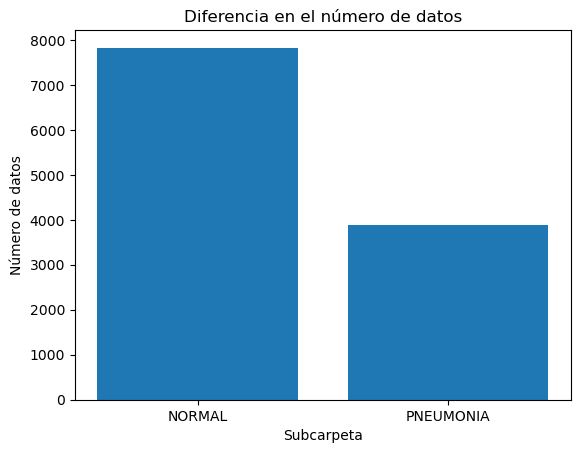

In [12]:
# Ruta de la carpeta con los datos
ruta_datos = "archive/chest_xray/train/"

# Crear una lista con los nombres de todas las subcarpetas en la carpeta con los datos
subcarpetas = [nombre for nombre in os.listdir(ruta_datos) if os.path.isdir(os.path.join(ruta_datos, nombre))]

# Crear un diccionario con la información del número de datos en cada subcarpeta
datos = {}
for subcarpeta in subcarpetas:
    ruta_subcarpeta = os.path.join(ruta_datos, subcarpeta)
    numero_datos = len(os.listdir(ruta_subcarpeta))
    datos[subcarpeta] = numero_datos

# Crear un dataframe con la información del número de datos en cada subcarpeta
df = pd.DataFrame.from_dict(datos, orient='index', columns=['Número de datos'])

# Crear un gráfico de barras para visualizar la diferencia en el número de datos
plt.bar(df.index, df['Número de datos'])
plt.title('Diferencia en el número de datos')
plt.xlabel('Subcarpeta')
plt.ylabel('Número de datos')
plt.show()

El siguiente código está comentado ya que sirve para generar una cierta cantidad de imágenes. Se utilizó para generar más datos para el entrenamiento y se comenta para que no se ejecute cada vez que se quiere ver los resultados del modelo.

In [13]:
'''
# Ruta de la carpeta con las imágenes originales
ruta_originales = "archive/chest_xray/test/NORMAL/"

# Cargar todas las imágenes en la carpeta
imagenes_originales = []
for filename in os.listdir(ruta_originales):
    imagen = Image.open(os.path.join(ruta_originales, filename))
    imagenes_originales.append(imagen)

# Definir las transformaciones de data augmentation
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
j = 0
# Generar nuevas imágenes utilizando las transformaciones definidas
for imagen in imagenes_originales:
    if j < 200:
        x = imagen.resize((256, 256))
        x = x.convert('RGB')
        x = np.array(x)
        x = x.reshape((1,) + x.shape)
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir='archive/chest_xray/test/NORMAL/', save_prefix='aug', save_format='jpeg'):
            i += 1
            if i > 1: # Generar 2 imágenes nuevas por cada imagen original
                break
        j += 1
'''

'\n# Ruta de la carpeta con las imágenes originales\nruta_originales = "archive/chest_xray/test/NORMAL/"\n\n# Cargar todas las imágenes en la carpeta\nimagenes_originales = []\nfor filename in os.listdir(ruta_originales):\n    imagen = Image.open(os.path.join(ruta_originales, filename))\n    imagenes_originales.append(imagen)\n\n# Definir las transformaciones de data augmentation\ndatagen = ImageDataGenerator(\n        rotation_range=20,\n        width_shift_range=0.1,\n        height_shift_range=0.1,\n        shear_range=0.2,\n        zoom_range=0.2,\n        horizontal_flip=True,\n        fill_mode=\'nearest\')\nj = 0\n# Generar nuevas imágenes utilizando las transformaciones definidas\nfor imagen in imagenes_originales:\n    if j < 200:\n        x = imagen.resize((256, 256))\n        x = x.convert(\'RGB\')\n        x = np.array(x)\n        x = x.reshape((1,) + x.shape)\n        i = 0\n        for batch in datagen.flow(x, batch_size=1, save_to_dir=\'archive/chest_xray/test/NORMAL/\',

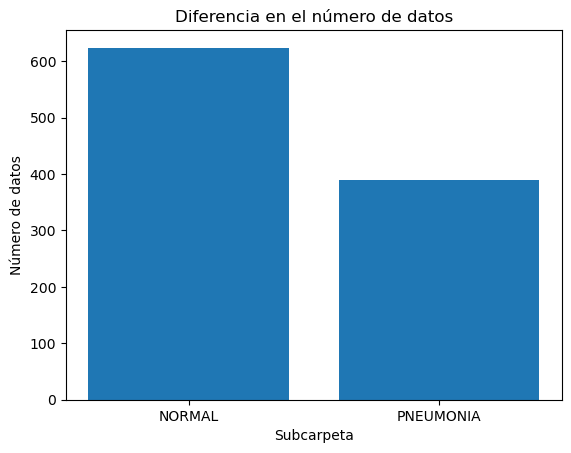

In [14]:
# Ruta de la carpeta con los datos
ruta_datos = "archive/chest_xray/test/"

# Crear una lista con los nombres de todas las subcarpetas en la carpeta con los datos
subcarpetas = [nombre for nombre in os.listdir(ruta_datos) if os.path.isdir(os.path.join(ruta_datos, nombre))]

# Crear un diccionario con la información del número de datos en cada subcarpeta
datos = {}
for subcarpeta in subcarpetas:
    ruta_subcarpeta = os.path.join(ruta_datos, subcarpeta)
    numero_datos = len(os.listdir(ruta_subcarpeta))
    datos[subcarpeta] = numero_datos

# Crear un dataframe con la información del número de datos en cada subcarpeta
df = pd.DataFrame.from_dict(datos, orient='index', columns=['Número de datos'])

# Crear un gráfico de barras para visualizar la diferencia en el número de datos
plt.bar(df.index, df['Número de datos'])
plt.title('Diferencia en el número de datos')
plt.xlabel('Subcarpeta')
plt.ylabel('Número de datos')
plt.show()


In [2]:
class StopTrainingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss') < 0.2:
            print('\nSe ha alcanzado el valor de pérdida deseado.')
            self.model.stop_training = True


<div id='id12'>

### *1.2 - Arquitectura de red y entrenamiento*

Crea  una  red  convolucional  secuencial.  Juega  con  los  tamaños  de  los  filtros  y  decide  el  tamaño  de  las capas de ‘pooling’. Utiliza al menos 3 capas de convolución. 

En el caso de las funciones de activación, lo normal en este tipo de redes es usar ReLU en todas las capas, menos en la de salida que se debe de usar softmaxpara  clasificaciones  no  binarias.  

Para  actualizar  los  pesos,  usaremos  el  optimizer  ‘Adam’  y  la  función de error ‘categorical_crossentropy’. Prueba con distintos ‘learning rates’.


Desarrolla las distintas fases de un predictor: entrenamiento + validación y predicción.

#### - Entrenamiento

In [16]:
model = Sequential()
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1))
model.add(normalization_layer)
# capa de convolución 1
model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid', input_shape=(200,200,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# capa de convolución 2
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# capa de convolución 3
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# capa de convolución 4
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# capa de convolución 5
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# capa completamente conectada 1
model.add(Flatten())
model.add(Dense(4096, input_shape=(200*200,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))

# capa completamente conectada 2
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))

# capa de salida
model.add(Dense(2))
model.add(Activation('softmax'))

# compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate = 0.01), metrics=['accuracy'])

stop_training_callback = StopTrainingCallback()
history = model.fit(
        train_generator_1,
        epochs = epochs,
        validation_data = test_generator_1,
        callbacks = [stop_training_callback],
)

Epoch 1/1000
183/183 [==============================] - 661s 4s/step - loss: 0.6241 - accuracy: 0.6667 - val_loss: 0.6411 - val_accuracy: 0.6154
Epoch 2/1000
183/183 [==============================] - 641s 3s/step - loss: 0.5884 - accuracy: 0.6715 - val_loss: 0.5929 - val_accuracy: 0.6154
Epoch 3/1000
183/183 [==============================] - 599s 3s/step - loss: 0.4946 - accuracy: 0.7526 - val_loss: 0.3960 - val_accuracy: 0.8018
Epoch 4/1000
183/183 [==============================] - 559s 3s/step - loss: 0.2434 - accuracy: 0.9032 - val_loss: 0.4895 - val_accuracy: 0.7880
Epoch 5/1000
183/183 [==============================] - ETA: 0s - loss: 0.1770 - accuracy: 0.9300
Se ha alcanzado el valor de pérdida deseado.
183/183 [==============================] - 576s 3s/step - loss: 0.1770 - accuracy: 0.9300 - val_loss: 0.2861 - val_accuracy: 0.8925


In [25]:
# Guardar el modelo
model.save('modelo.h5')

In [17]:
import winsound

# Reproduce un pitido durante 1 segundo a 440 Hz
duration = 1000  # duración en milisegundos
freq = 440  # frecuencia en Hz
winsound.Beep(freq, duration)


#### - Arquitectura de la red dibujada

1/1 [==============================] - 0s 269ms/step - loss: 0.3872 - accuracy: 0.7500
Test accuracy: 0.75
Test loss: 0.38717031478881836


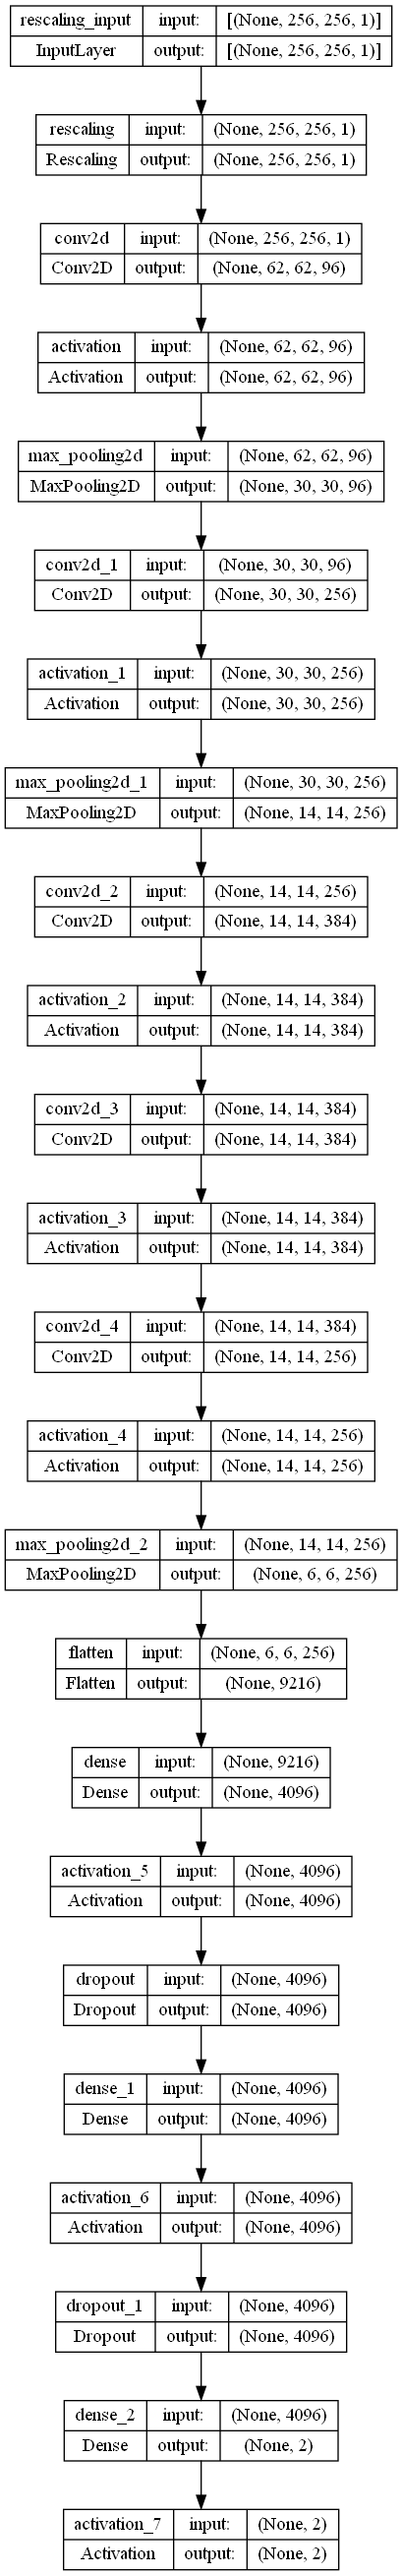

In [18]:
from IPython.display import Image
# Guarda la imagen del modelo
plot_model(model, to_file = 'modeloCalificación1.png', show_shapes=True)

# Evaluar el modelo con los datos de prueba
test_loss, test_acc = model.evaluate(val_generator_1)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Muestra la imagen del modelo
Image(filename = 'modeloCalificación1.png')

#### - Gráfica de Variación del error según los epochs y Matriz de confusión

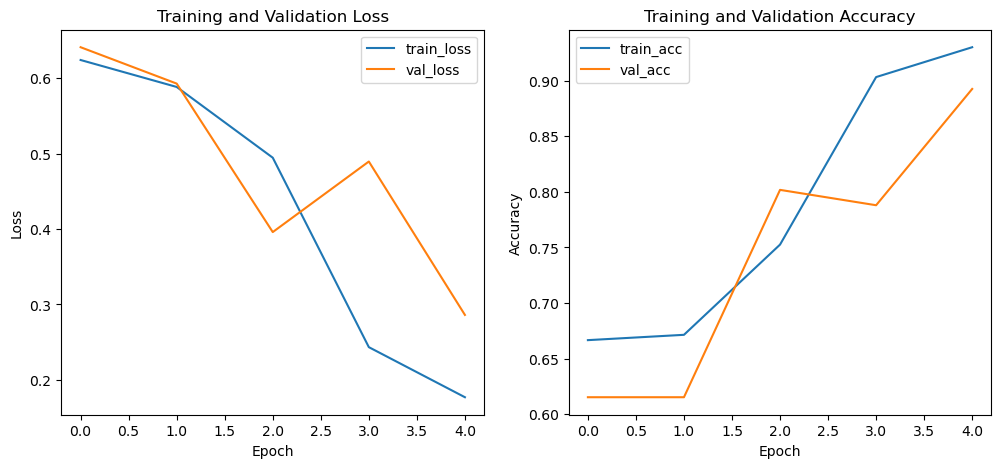

32/32 [==============================] - 16s 476ms/step


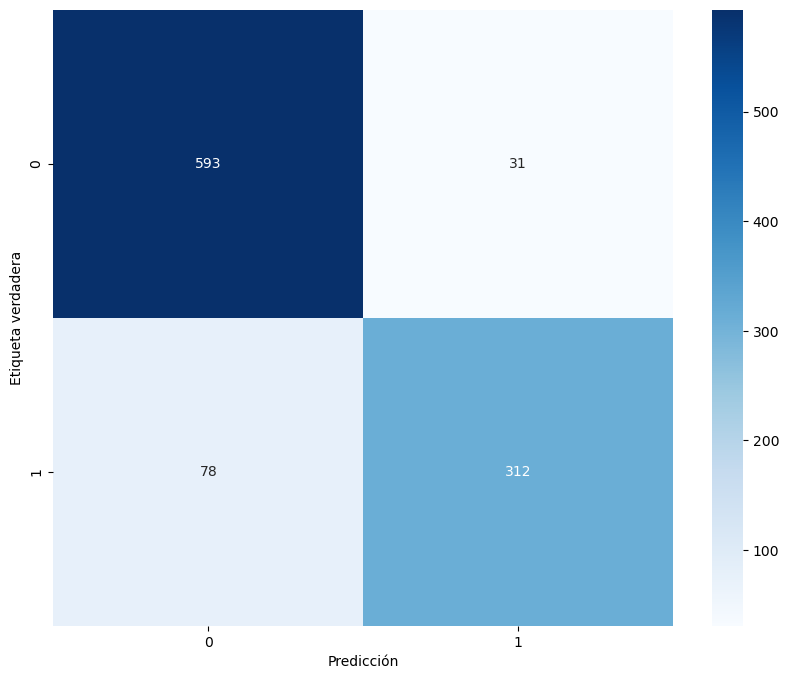

In [19]:
# Obtener los valores de loss y accuracy del entrenamiento y validación
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Crear una figura con dos subplots para mostrar loss y accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de loss
ax1.plot(train_loss, label='train_loss')
ax1.plot(val_loss, label='val_loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Gráfico de accuracy
ax2.plot(train_acc, label = 'train_acc')
ax2.plot(val_acc, label = 'val_acc')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

# Obtener predicciones para el conjunto de prueba
y_pred = model.predict(test_generator_1)
# Convertir las probabilidades en etiquetas de clase
y_pred = np.argmax(y_pred, axis=1)
# Obtener las etiquetas verdaderas del conjunto de prueba
y_true = test_generator_1.classes

# Crear matriz de confusión
confusion_mtx = confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta verdadera')
plt.show()

<div id='id13'>

### *1.3 - Evaluación y predicción*

c:\Users\guill\anaconda3\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 67ms/step


c:\Users\guill\anaconda3\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


1/1 [==============================] - 0s 59ms/step


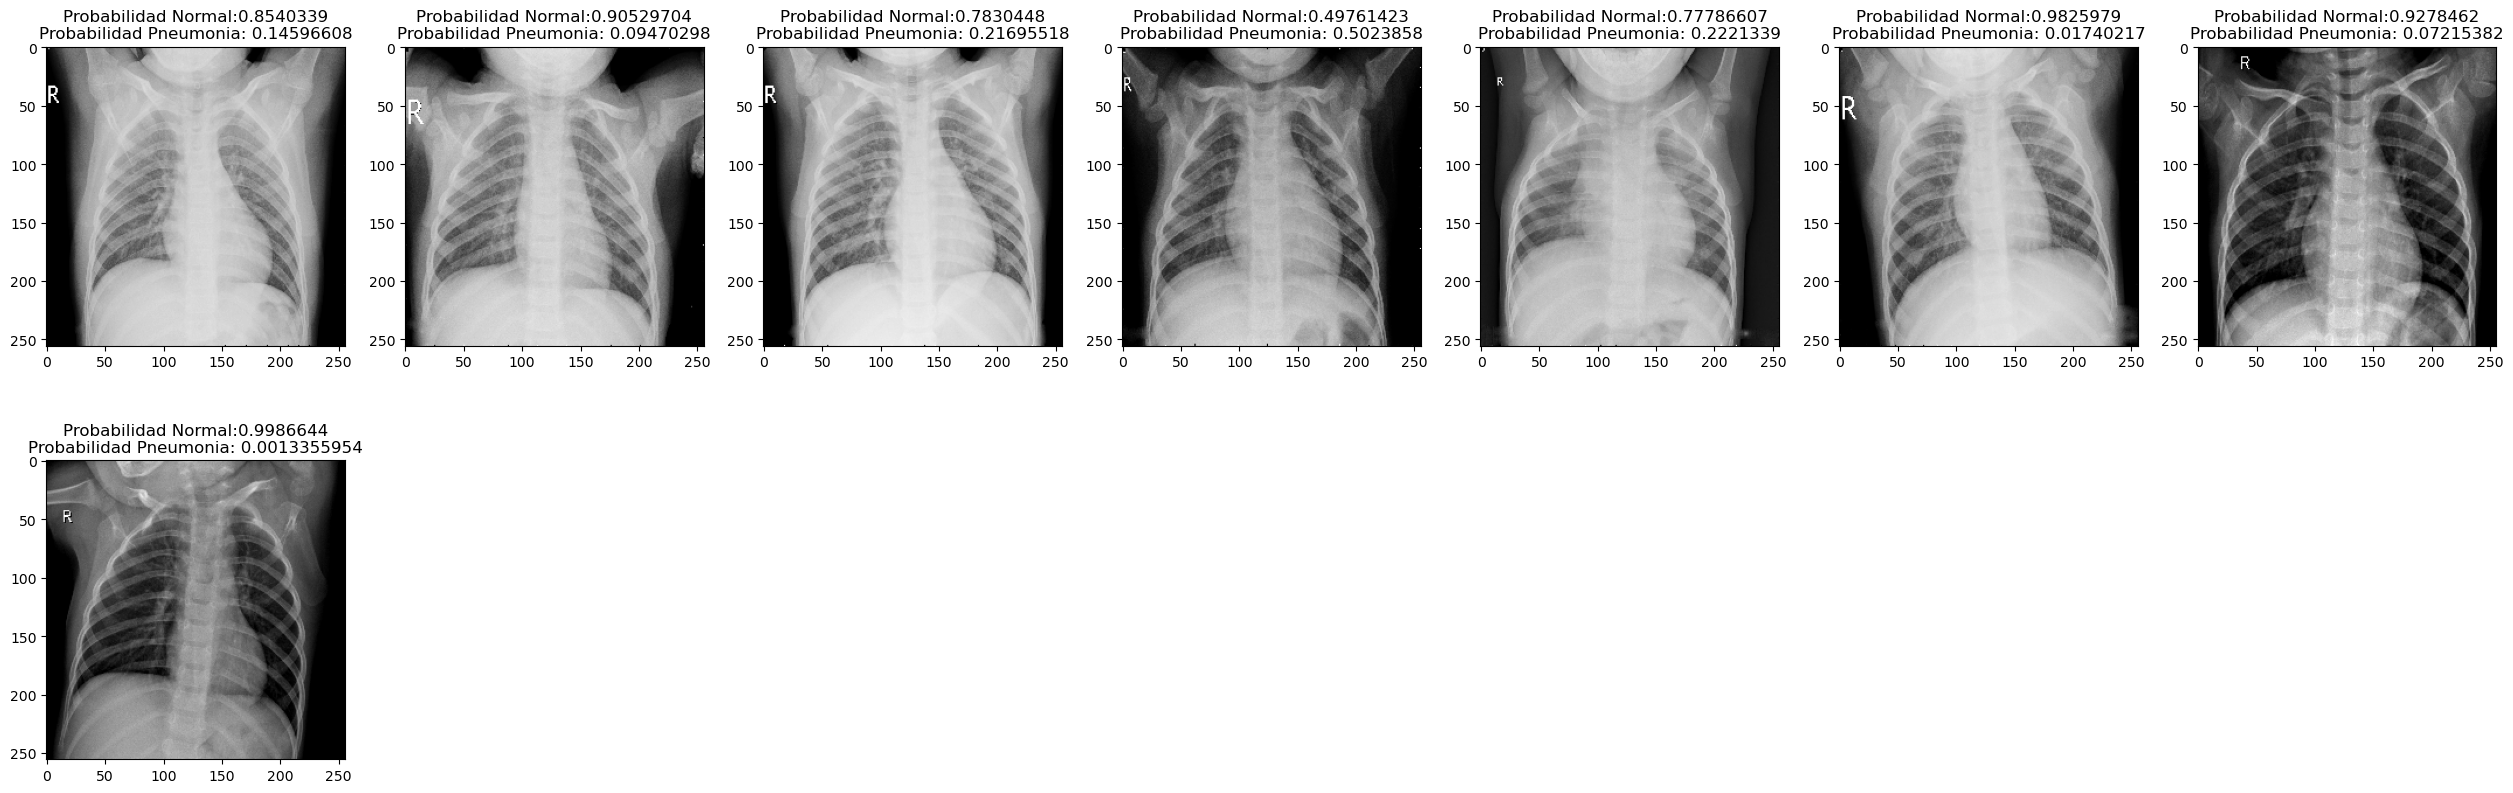

In [20]:
current_dir = os.getcwd()
i = 0
probs = []
plt.figure(figsize=(25, 8))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for file in os.listdir( current_dir + '/archive/chest_xray/val/NORMAL/'):
    plt.subplot(2, 7, i + 1)
    i = i+1
    img = load_img(current_dir + '/archive/chest_xray/val/NORMAL/' + file, target_size = (img_width, img_height), grayscale=True)  
    x = img_to_array(img)  
    img_batch = np.expand_dims(x, axis=0)
    prediction = model.predict(img_batch)
    plt.title(prediction)
    plt.title( 'Probabilidad Normal:' + str(prediction[0][0]) + '\nProbabilidad Pneumonia: ' + str(prediction[0][1])) 
    plt.imshow(img, cmap='gray')

1/1 [==============================] - 0s 74ms/step


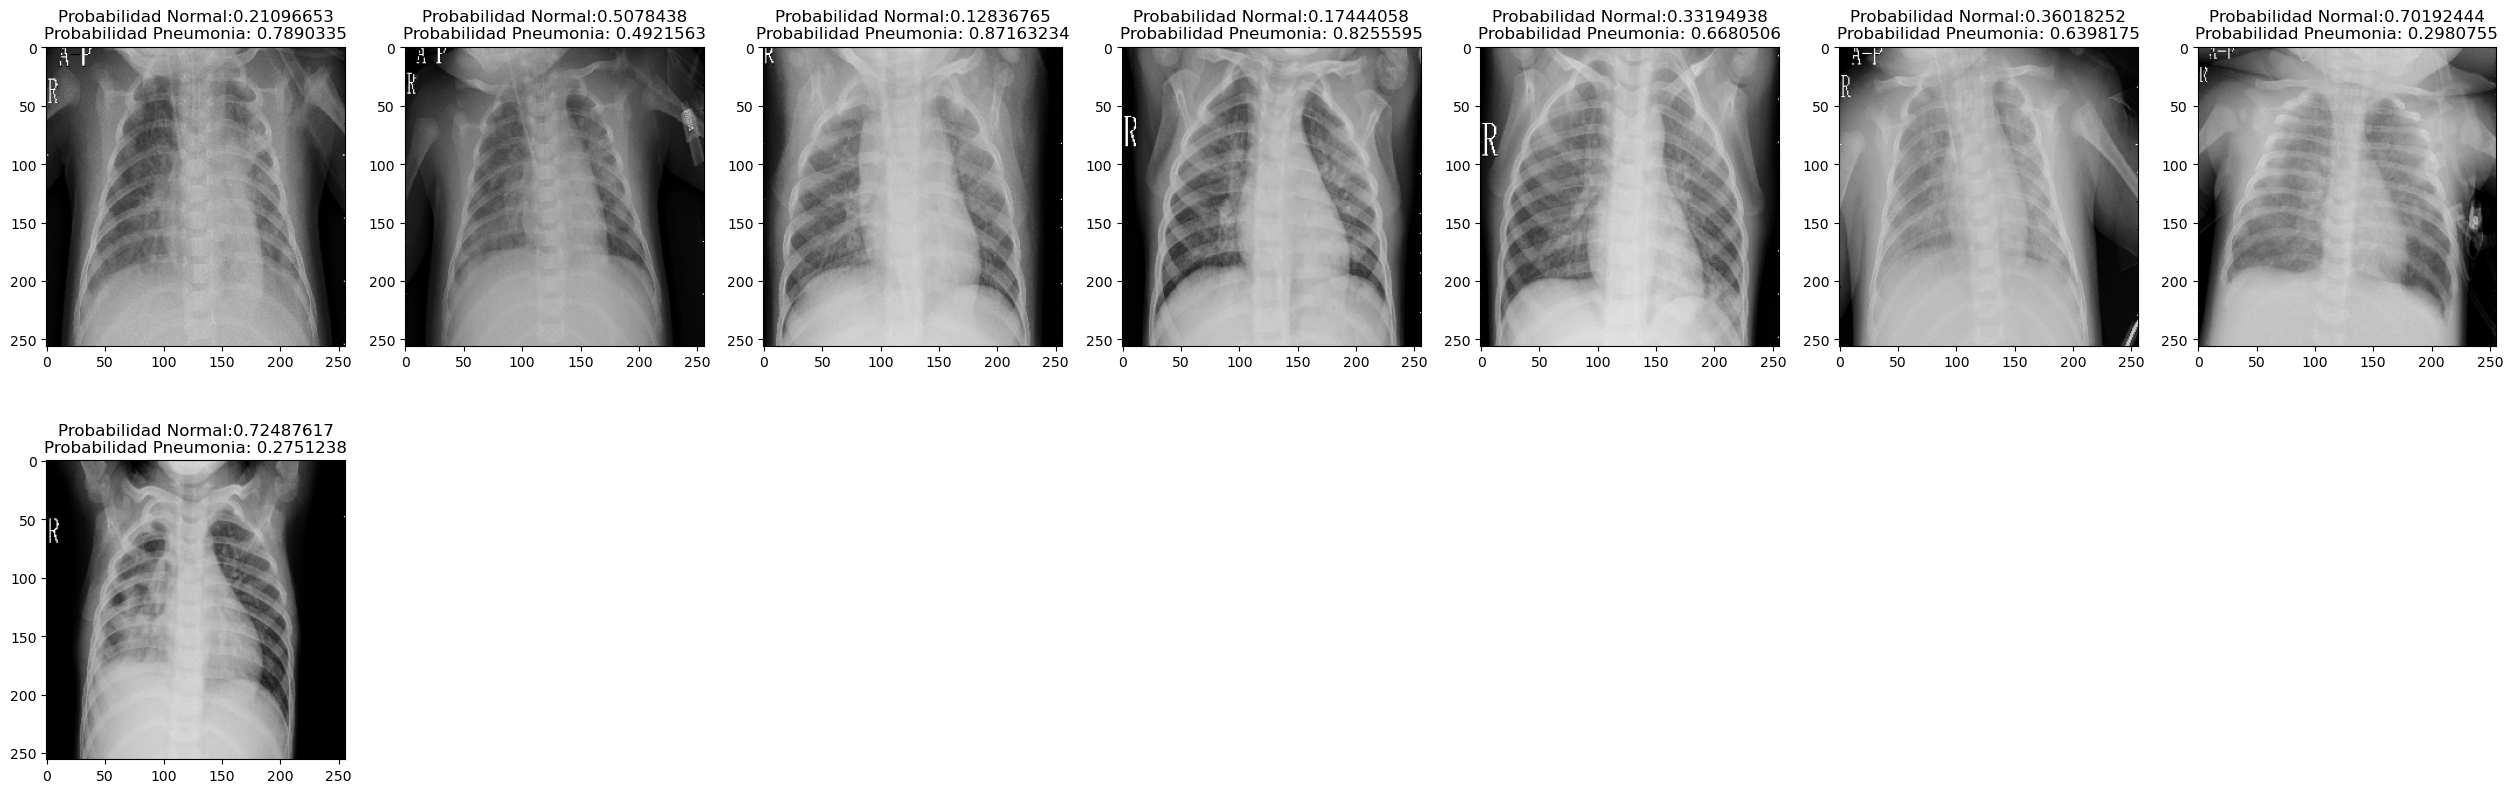

In [24]:
current_dir = os.getcwd()
i = 0
probs = []
plt.figure(figsize=(25, 8))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for file in os.listdir( current_dir + '/archive/chest_xray/val/PNEUMONIA/'):
    plt.subplot(2, 7, i + 1)
    i = i+1
    img = load_img(current_dir + '/archive/chest_xray/val/PNEUMONIA/' + file, target_size = (img_width, img_height), grayscale=True)  
    x = img_to_array(img)  
    img_batch = np.expand_dims(x, axis=0)
    prediction = model.predict(img_batch)
    plt.title(prediction)
    plt.title( 'Probabilidad Normal:' + str(prediction[0][0]) + '\nProbabilidad Pneumonia: ' + str(prediction[0][1])) 
    plt.imshow(img, cmap='gray')

<div id='id2'>

## *2-PNEUMONIA VÍRICA VS PNEUMONIA BACTERIANA VS NORMAL*
---

<div id='id21'>

### *2.1 - Preprocesamiento*

Prepara los datos de entrada (puede que no haya suficientes) y divídelos en los datasets necesarios.

#### Importar librerías

In [3]:
from PIL import Image
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix

In [4]:
# Especificar la ruta principal donde se crearán los directorios
ruta_principal = 'archive/chest_xray/chest_xray/train/'

# Crear el directorio "bacteria" en la ruta principal si no existe
ruta_bacteria = os.path.join(ruta_principal, 'PNEUMONIA_Bacteriana')
if not os.path.exists(ruta_bacteria):
    os.makedirs(ruta_bacteria)

# Crear el directorio "virus" en la ruta principal si no existe
ruta_virus = os.path.join(ruta_principal, 'PNEUMONIA_Virica')
if not os.path.exists(ruta_virus):
    os.makedirs(ruta_virus)

# Definir el directorio de la carpeta PNEUMONIA
pneumonia_dir = 'archive/chest_xray/chest_xray/train/PNEUMONIA/'

# Definir el directorio de la carpeta para las imágenes de bacteria
bacteria_dir = 'archive/chest_xray/chest_xray/train/PNEUMONIA_Bacteriana'

# Definir el directorio de la carpeta para las imágenes de virus
virus_dir = 'archive/chest_xray/chest_xray/train/PNEUMONIA_Virica'

# Iterar a través de los archivos en la carpeta PNEUMONIA
if os.path.exists('archive/chest_xray/chest_xray/train/PNEUMONIA'):
    for filename in os.listdir(pneumonia_dir):
        # Si el nombre de archivo contiene la palabra "bacteria", copiar a la carpeta de bacteria
        if 'bacteria' in filename:
            shutil.copy(pneumonia_dir + filename, bacteria_dir)
        # Si el nombre de archivo contiene la palabra "virus", copiar a la carpeta de virus
        elif 'virus' in filename:
            shutil.copy(pneumonia_dir + filename, virus_dir)
    shutil.rmtree('archive/chest_xray/chest_xray/train/PNEUMONIA')



In [5]:
# Especificar la ruta principal donde se crearán los directorios
ruta_principal = 'archive/chest_xray/chest_xray/test/'

# Crear el directorio "bacteria" en la ruta principal si no existe
ruta_bacteria = os.path.join(ruta_principal, 'PNEUMONIA_Bacteriana')
if not os.path.exists(ruta_bacteria):
    os.makedirs(ruta_bacteria)

# Crear el directorio "virus" en la ruta principal si no existe
ruta_virus = os.path.join(ruta_principal, 'PNEUMONIA_Virica')
if not os.path.exists(ruta_virus):
    os.makedirs(ruta_virus)

# Definir el directorio de la carpeta PNEUMONIA
pneumonia_dir = 'archive/chest_xray/chest_xray/test/PNEUMONIA/'

# Definir el directorio de la carpeta para las imágenes de bacteria
bacteria_dir = 'archive/chest_xray/chest_xray/test/PNEUMONIA_Bacteriana'

# Definir el directorio de la carpeta para las imágenes de virus
virus_dir = 'archive/chest_xray/chest_xray/test/PNEUMONIA_Virica'

# Iterar a través de los archivos en la carpeta PNEUMONIA
if os.path.exists('archive/chest_xray/chest_xray/test/PNEUMONIA'):
    for filename in os.listdir(pneumonia_dir):
        # Si el nombre de archivo contiene la palabra "bacteria", copiar a la carpeta de bacteria
        if 'bacteria' in filename:
            shutil.copy(pneumonia_dir + filename, bacteria_dir)
        # Si el nombre de archivo contiene la palabra "virus", copiar a la carpeta de virus
        elif 'virus' in filename:
            shutil.copy(pneumonia_dir + filename, virus_dir)
    shutil.rmtree('archive/chest_xray/chest_xray/test/PNEUMONIA')

In [6]:
# Especificar la ruta principal donde se crearán los directorios
ruta_principal = 'archive/chest_xray/chest_xray/val/'

# Crear el directorio "bacteria" en la ruta principal si no existe
ruta_bacteria = os.path.join(ruta_principal, 'PNEUMONIA_Bacteriana')
if not os.path.exists(ruta_bacteria):
    os.makedirs(ruta_bacteria)

# Crear el directorio "virus" en la ruta principal si no existe
ruta_virus = os.path.join(ruta_principal, 'PNEUMONIA_Virica')
if not os.path.exists(ruta_virus):
    os.makedirs(ruta_virus)

# Definir el directorio de la carpeta PNEUMONIA
pneumonia_dir = 'archive/chest_xray/chest_xray/val/PNEUMONIA/'

# Definir el directorio de la carpeta para las imágenes de bacteria
bacteria_dir = 'archive/chest_xray/chest_xray/val/PNEUMONIA_Bacteriana'

# Definir el directorio de la carpeta para las imágenes de virus
virus_dir = 'archive/chest_xray/chest_xray/val/PNEUMONIA_Virica'

# Iterar a través de los archivos en la carpeta PNEUMONIA
if os.path.exists('archive/chest_xray/chest_xray/val/PNEUMONIA'):
    for filename in os.listdir(pneumonia_dir):
        # Si el nombre de archivo contiene la palabra "bacteria", copiar a la carpeta de bacteria
        if 'bacteria' in filename:
            shutil.copy(pneumonia_dir + filename, bacteria_dir)
        # Si el nombre de archivo contiene la palabra "virus", copiar a la carpeta de virus
        elif 'virus' in filename:
            shutil.copy(pneumonia_dir + filename, virus_dir)
    shutil.rmtree('archive/chest_xray/chest_xray/val/PNEUMONIA')

El siguiente código está comentado ya que sirve para generar una cierta cantidad de imágenes. Se utilizó para generar más datos para el entrenamiento y se comenta para que no se ejecute cada vez que se quiere ver los resultados del modelo.

In [36]:
'''
from PIL import Image
# Ruta de la carpeta con las imágenes originales
ruta_originales = "archive/chest_xray/chest_xray/test/PNEUMONIA_Virica/"

# Cargar todas las imágenes en la carpeta
imagenes_originales = []
for filename in os.listdir(ruta_originales):
    imagen = Image.open(os.path.join(ruta_originales, filename))
    imagenes_originales.append(imagen)

# Definir las transformaciones de data augmentation
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
j = 0
# Generar nuevas imágenes utilizando las transformaciones definidas
for imagen in imagenes_originales:
    if j < 8:
        x = imagen.resize((256, 256))
        x = x.convert('RGB')
        x = np.array(x)
        x = x.reshape((1,) + x.shape)
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir='archive/chest_xray/chest_xray/val/PNEUMONIA_Virica/', save_prefix='aug1', save_format='jpeg'):
            i += 1
            if i > 1: # Generar 2 imágenes nuevas por cada imagen original
                break
        j += 1
'''

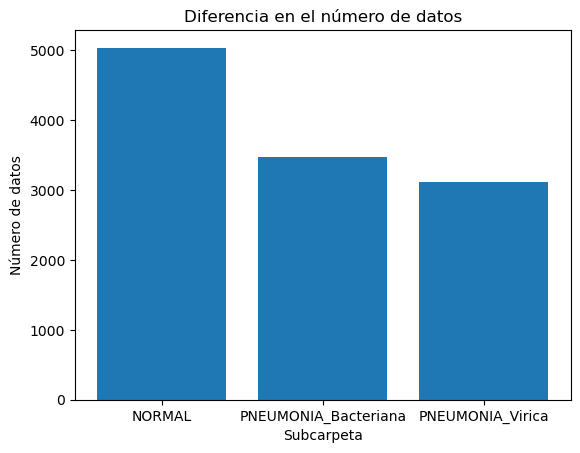

In [8]:
# Ruta de la carpeta con los datos
ruta_datos = "archive/chest_xray/chest_xray/train/"

# Crear una lista con los nombres de todas las subcarpetas en la carpeta con los datos
subcarpetas = [nombre for nombre in os.listdir(ruta_datos) if os.path.isdir(os.path.join(ruta_datos, nombre))]

# Crear un diccionario con la información del número de datos en cada subcarpeta
datos = {}
for subcarpeta in subcarpetas:
    ruta_subcarpeta = os.path.join(ruta_datos, subcarpeta)
    numero_datos = len(os.listdir(ruta_subcarpeta))
    datos[subcarpeta] = numero_datos

# Crear un dataframe con la información del número de datos en cada subcarpeta
df = pd.DataFrame.from_dict(datos, orient='index', columns=['Número de datos'])

# Crear un gráfico de barras para visualizar la diferencia en el número de datos
plt.bar(df.index, df['Número de datos'])
plt.title('Diferencia en el número de datos')
plt.xlabel('Subcarpeta')
plt.ylabel('Número de datos')
plt.show()

El siguiente código está comentado ya que sirve para generar una cierta cantidad de imágenes. Se utilizó para generar más datos para el entrenamiento y se comenta para que no se ejecute cada vez que se quiere ver los resultados del modelo.

In [9]:
'''
# Ruta de la carpeta con las imágenes originales
ruta_originales = "archive/chest_xray/chest_xray/test/PNEUMONIA_Virica/"

# Cargar todas las imágenes en la carpeta
imagenes_originales = []
for filename in os.listdir(ruta_originales):
    imagen = Image.open(os.path.join(ruta_originales, filename))
    imagenes_originales.append(imagen)

# Definir las transformaciones de data augmentation
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
j = 0
# Generar nuevas imágenes utilizando las transformaciones definidas
for imagen in imagenes_originales:
    if j < 100:
        x = imagen.resize((256, 256))
        x = x.convert('RGB')
        x = np.array(x)
        x = x.reshape((1,) + x.shape)
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir='archive/chest_xray/chest_xray/test/PNEUMONIA_Virica/', save_prefix='aug', save_format='jpeg'):
            i += 1
            if i > 1: # Generar 2 imágenes nuevas por cada imagen original
                break
        j += 1
'''

'\n# Ruta de la carpeta con las imágenes originales\nruta_originales = "archive/chest_xray/chest_xray/test/PNEUMONIA_Virica/"\n\n# Cargar todas las imágenes en la carpeta\nimagenes_originales = []\nfor filename in os.listdir(ruta_originales):\n    imagen = Image.open(os.path.join(ruta_originales, filename))\n    imagenes_originales.append(imagen)\n\n# Definir las transformaciones de data augmentation\ndatagen = ImageDataGenerator(\n        rotation_range=20,\n        width_shift_range=0.1,\n        height_shift_range=0.1,\n        shear_range=0.2,\n        zoom_range=0.2,\n        horizontal_flip=True,\n        fill_mode=\'nearest\')\nj = 0\n# Generar nuevas imágenes utilizando las transformaciones definidas\nfor imagen in imagenes_originales:\n    if j < 100:\n        x = imagen.resize((256, 256))\n        x = x.convert(\'RGB\')\n        x = np.array(x)\n        x = x.reshape((1,) + x.shape)\n        i = 0\n        for batch in datagen.flow(x, batch_size=1, save_to_dir=\'archive/chest

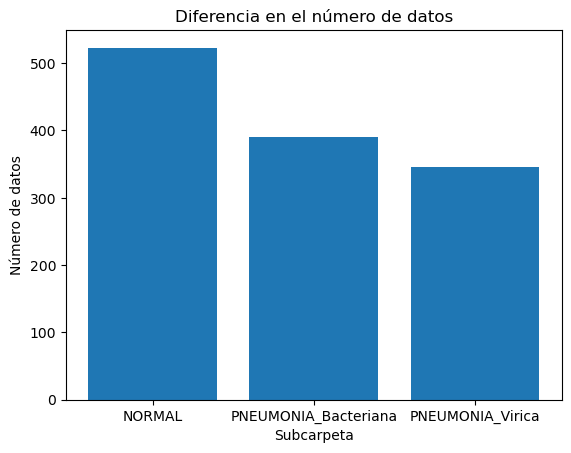

In [10]:
# Ruta de la carpeta con los datos
ruta_datos = "archive/chest_xray/chest_xray/test/"

# Crear una lista con los nombres de todas las subcarpetas en la carpeta con los datos
subcarpetas = [nombre for nombre in os.listdir(ruta_datos) if os.path.isdir(os.path.join(ruta_datos, nombre))]

# Crear un diccionario con la información del número de datos en cada subcarpeta
datos = {}
for subcarpeta in subcarpetas:
    ruta_subcarpeta = os.path.join(ruta_datos, subcarpeta)
    numero_datos = len(os.listdir(ruta_subcarpeta))
    datos[subcarpeta] = numero_datos

# Crear un dataframe con la información del número de datos en cada subcarpeta
df = pd.DataFrame.from_dict(datos, orient='index', columns=['Número de datos'])

# Crear un gráfico de barras para visualizar la diferencia en el número de datos
plt.bar(df.index, df['Número de datos'])
plt.title('Diferencia en el número de datos')
plt.xlabel('Subcarpeta')
plt.ylabel('Número de datos')
plt.show()

In [6]:
# Directorios de entrenamiento, validación y prueba
train_dir = 'archive/chest_xray/chest_xray/train/'
val_dir = 'archive/chest_xray/chest_xray/val/'
test_dir = 'archive/chest_xray/chest_xray/test/'

# Altura y anchura de la imagen
img_width, img_height = 256, 256
# Tamaño de lote
batch_size = 64
# Epocas
epochs = 1000

# Preprocesar los datos de imagen utilizando ImageDataGenerator

test_datagen = ImageDataGenerator()

train_generator_1 = tf.keras.preprocessing.image_dataset_from_directory(train_dir, 
                                                      image_size=(img_width, img_height),
                                                      batch_size=batch_size,
                                                      color_mode="grayscale",
                                                      seed=1234, 
                                                      label_mode='categorical',)

val_generator_1 = tf.keras.preprocessing.image_dataset_from_directory(val_dir, 
                                                    image_size=(img_width, img_height),
                                                    batch_size=batch_size, 
                                                    color_mode="grayscale",
                                                    seed=1234,
                                                    label_mode='categorical')

test_generator_1 = test_datagen.flow_from_directory(test_dir, 
                                                     color_mode="grayscale",
                                                    seed=1234,
                                                    target_size=(img_height, img_width),
                                                    class_mode="categorical", batch_size=32,
                                                    shuffle=False)

Found 11627 files belonging to 3 classes.
Found 24 files belonging to 3 classes.
Found 1259 images belonging to 3 classes.


<div id='id22'>

### *2.2 - Arquitectura de red y entrenamiento*


Crea  una  red  convolucional  secuencial.  Juega  con  los  tamaños  de  los  filtros  y  decide  el  tamaño  de  las capas de ‘pooling’. Utiliza al menos 3 capas de convolución. 

En el caso de las funciones de activación, lo normal en este tipo de redes es usar ReLU en todas las capas, menos en la de salida que se debe de usar softmaxpara  clasificaciones  no  binarias.  

Para  actualizar  los  pesos,  usaremos  el  optimizer  ‘Adam’  y  la  función de error ‘categorical_crossentropy’. Prueba con distintos ‘learning rates’.


Desarrolla las distintas fases de un predictor: entrenamiento + validación y predicción.

#### - Entrenamiento

In [12]:
model = Sequential()

# Capa de entrada y normalización
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1))
model.add(normalization_layer)

# Capa de convolución 1
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Capa de convolución 2
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Capa de convolución 3
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Capa completamente conectada 1
model.add(Flatten())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Capa de salida
model.add(Dense(3))
model.add(Activation('softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

stop_training_callback = StopTrainingCallback()
history = model.fit(
        train_generator_1,
        epochs = epochs,
        validation_data = test_generator_1,
        callbacks = [stop_training_callback],
)

Epoch 1/1000
182/182 [==============================] - 305s 2s/step - loss: 0.8087 - accuracy: 0.6566 - val_loss: 2.1917 - val_accuracy: 0.2740
Epoch 2/1000
182/182 [==============================] - 285s 2s/step - loss: 0.5735 - accuracy: 0.7648 - val_loss: 0.9926 - val_accuracy: 0.4813
Epoch 3/1000
182/182 [==============================] - 364s 2s/step - loss: 0.5147 - accuracy: 0.7880 - val_loss: 1.1663 - val_accuracy: 0.6275
Epoch 4/1000
182/182 [==============================] - 341s 2s/step - loss: 0.4700 - accuracy: 0.8059 - val_loss: 0.7151 - val_accuracy: 0.7236
Epoch 5/1000
182/182 [==============================] - 333s 2s/step - loss: 0.4458 - accuracy: 0.8149 - val_loss: 0.6294 - val_accuracy: 0.7760
Epoch 6/1000
182/182 [==============================] - 332s 2s/step - loss: 0.4182 - accuracy: 0.8294 - val_loss: 0.6533 - val_accuracy: 0.7760
Epoch 7/1000
182/182 [==============================] - 403s 2s/step - loss: 0.3888 - accuracy: 0.8405 - val_loss: 0.7727 - val_ac

#### - Arquitectura de la red

1/1 [==============================] - 0s 189ms/step - loss: 1.3545 - accuracy: 0.5833
Test accuracy: 0.5833333134651184
Test loss: 1.3544684648513794


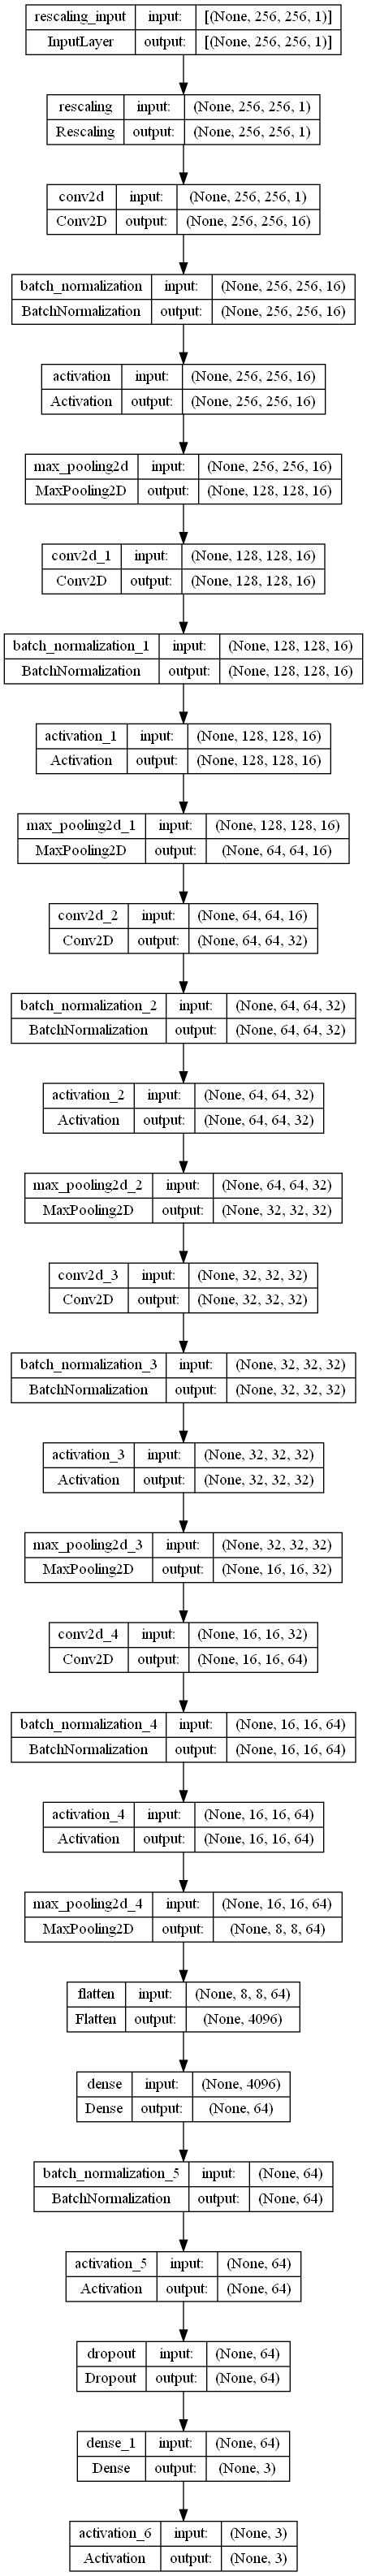

In [8]:
from IPython.display import Image
# Guarda la imagen del modelo
plot_model(model, to_file = 'modeloCalificación1.png', show_shapes=True)

# Evaluar el modelo con los datos de prueba
test_loss, test_acc = model.evaluate(val_generator_1)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Muestra la imagen del modelo
Image(filename = 'modeloCalificación1.png')

In [44]:
model.save('modeloParte2.h5')

#### - Gráfica de Variación del error según los epochs y Matriz de confusión

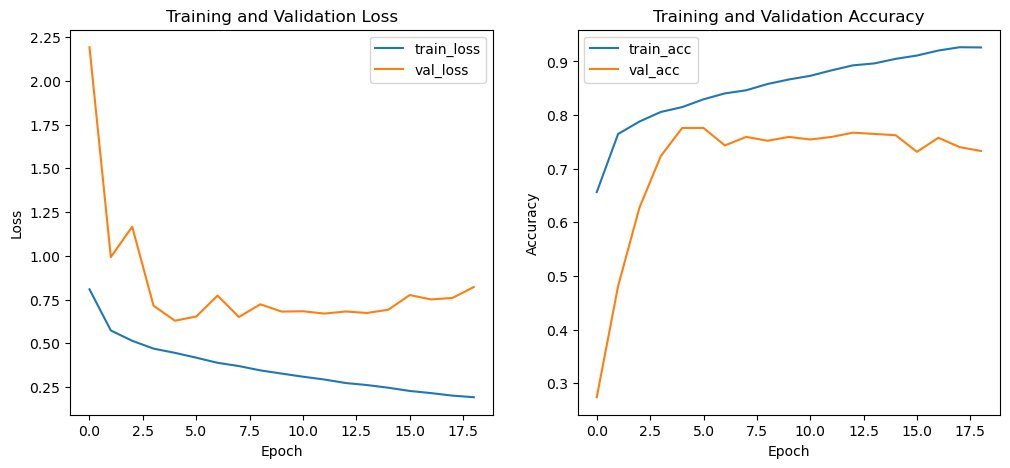

40/40 [==============================] - 11s 253ms/step


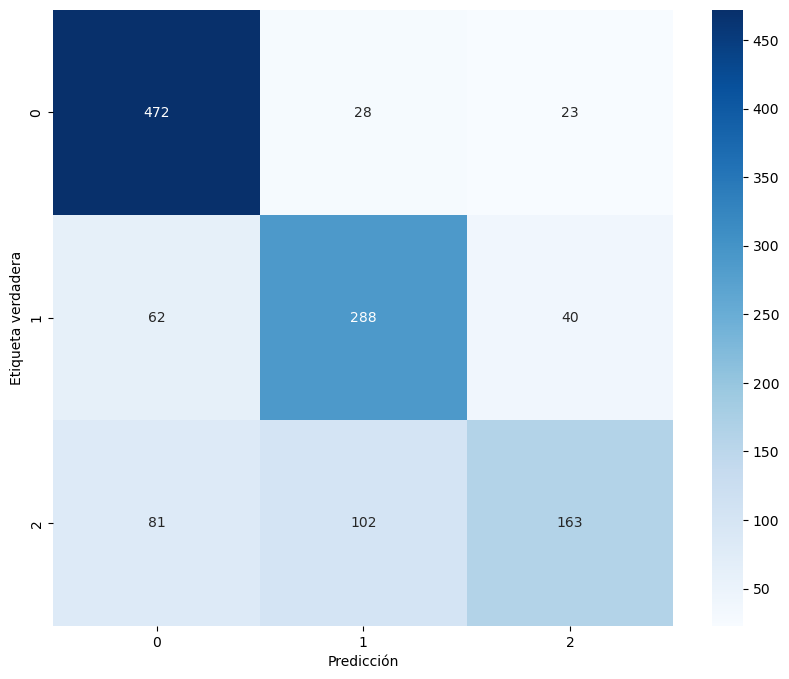

In [16]:
# Obtener los valores de loss y accuracy del entrenamiento y validación
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Crear una figura con dos subplots para mostrar loss y accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de loss
ax1.plot(train_loss, label='train_loss')
ax1.plot(val_loss, label='val_loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Gráfico de accuracy
ax2.plot(train_acc, label = 'train_acc')
ax2.plot(val_acc, label = 'val_acc')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

# Obtener predicciones para el conjunto de prueba
y_pred = model.predict(test_generator_1)
# Convertir las probabilidades en etiquetas de clase
y_pred = np.argmax(y_pred, axis=1)
# Obtener las etiquetas verdaderas del conjunto de prueba
y_true = test_generator_1.classes

# Crear matriz de confusión
confusion_mtx = confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta verdadera')
plt.show()

<div id='id23'>

### *2.3 - Evaluación y predicción*

c:\Users\julia\anaconda3\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 169ms/step


c:\Users\julia\anaconda3\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


1/1 [==============================] - 0s 29ms/step


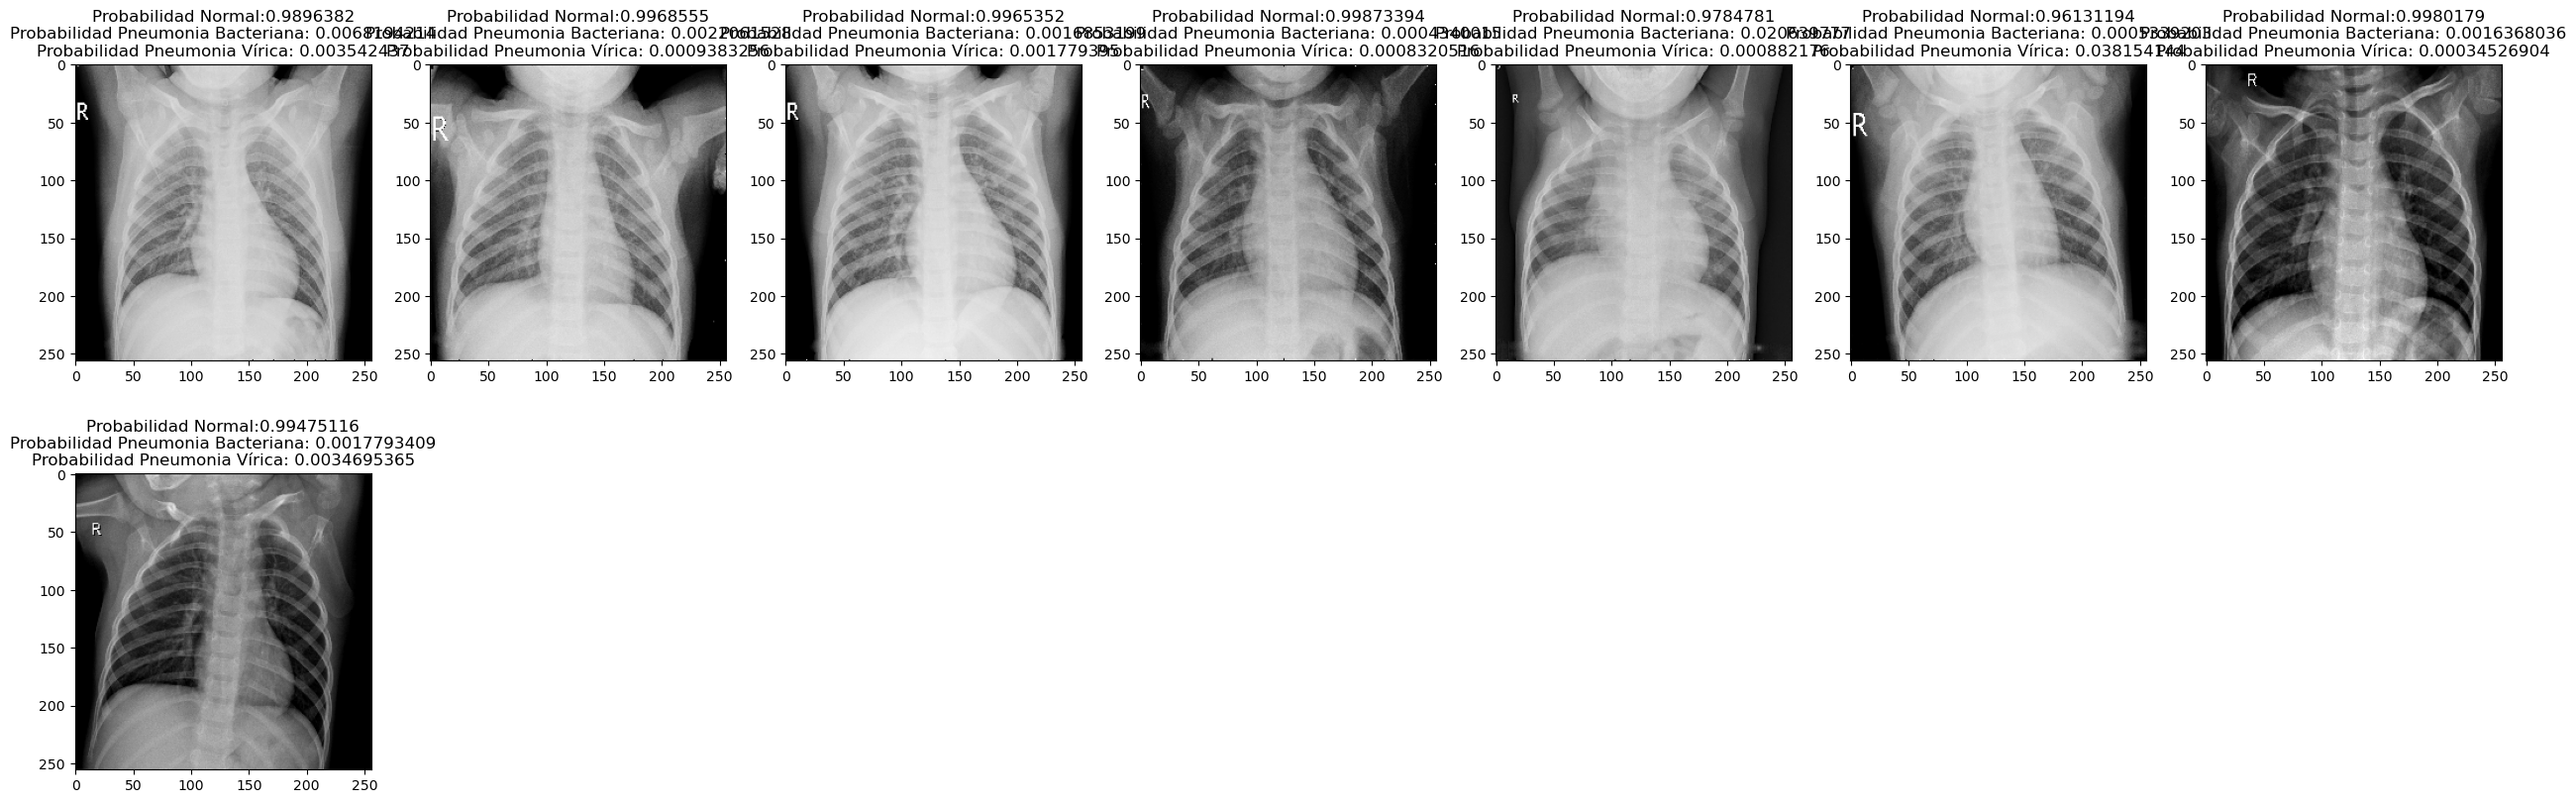

In [17]:
current_dir = os.getcwd()
i = 0
probs = []
plt.figure(figsize=(25, 8))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for file in os.listdir( current_dir + '/archive/chest_xray/chest_xray/val/NORMAL/'):
    plt.subplot(2, 7, i + 1)
    i = i+1
    img = load_img(current_dir + '/archive/chest_xray/chest_xray/val/NORMAL/' + file, target_size = (img_width, img_height), grayscale=True)  
    x = img_to_array(img)  
    img_batch = np.expand_dims(x, axis=0)
    prediction = model.predict(img_batch)
    plt.title(prediction)
    plt.title( 'Probabilidad Normal:' + str(prediction[0][0]) + '\nProbabilidad Pneumonia Bacteriana: ' + str(prediction[0][1]) + '\nProbabilidad Pneumonia Vírica: ' + str(prediction[0][2])) 
    plt.imshow(img, cmap='gray')

1/1 [==============================] - 0s 26ms/step


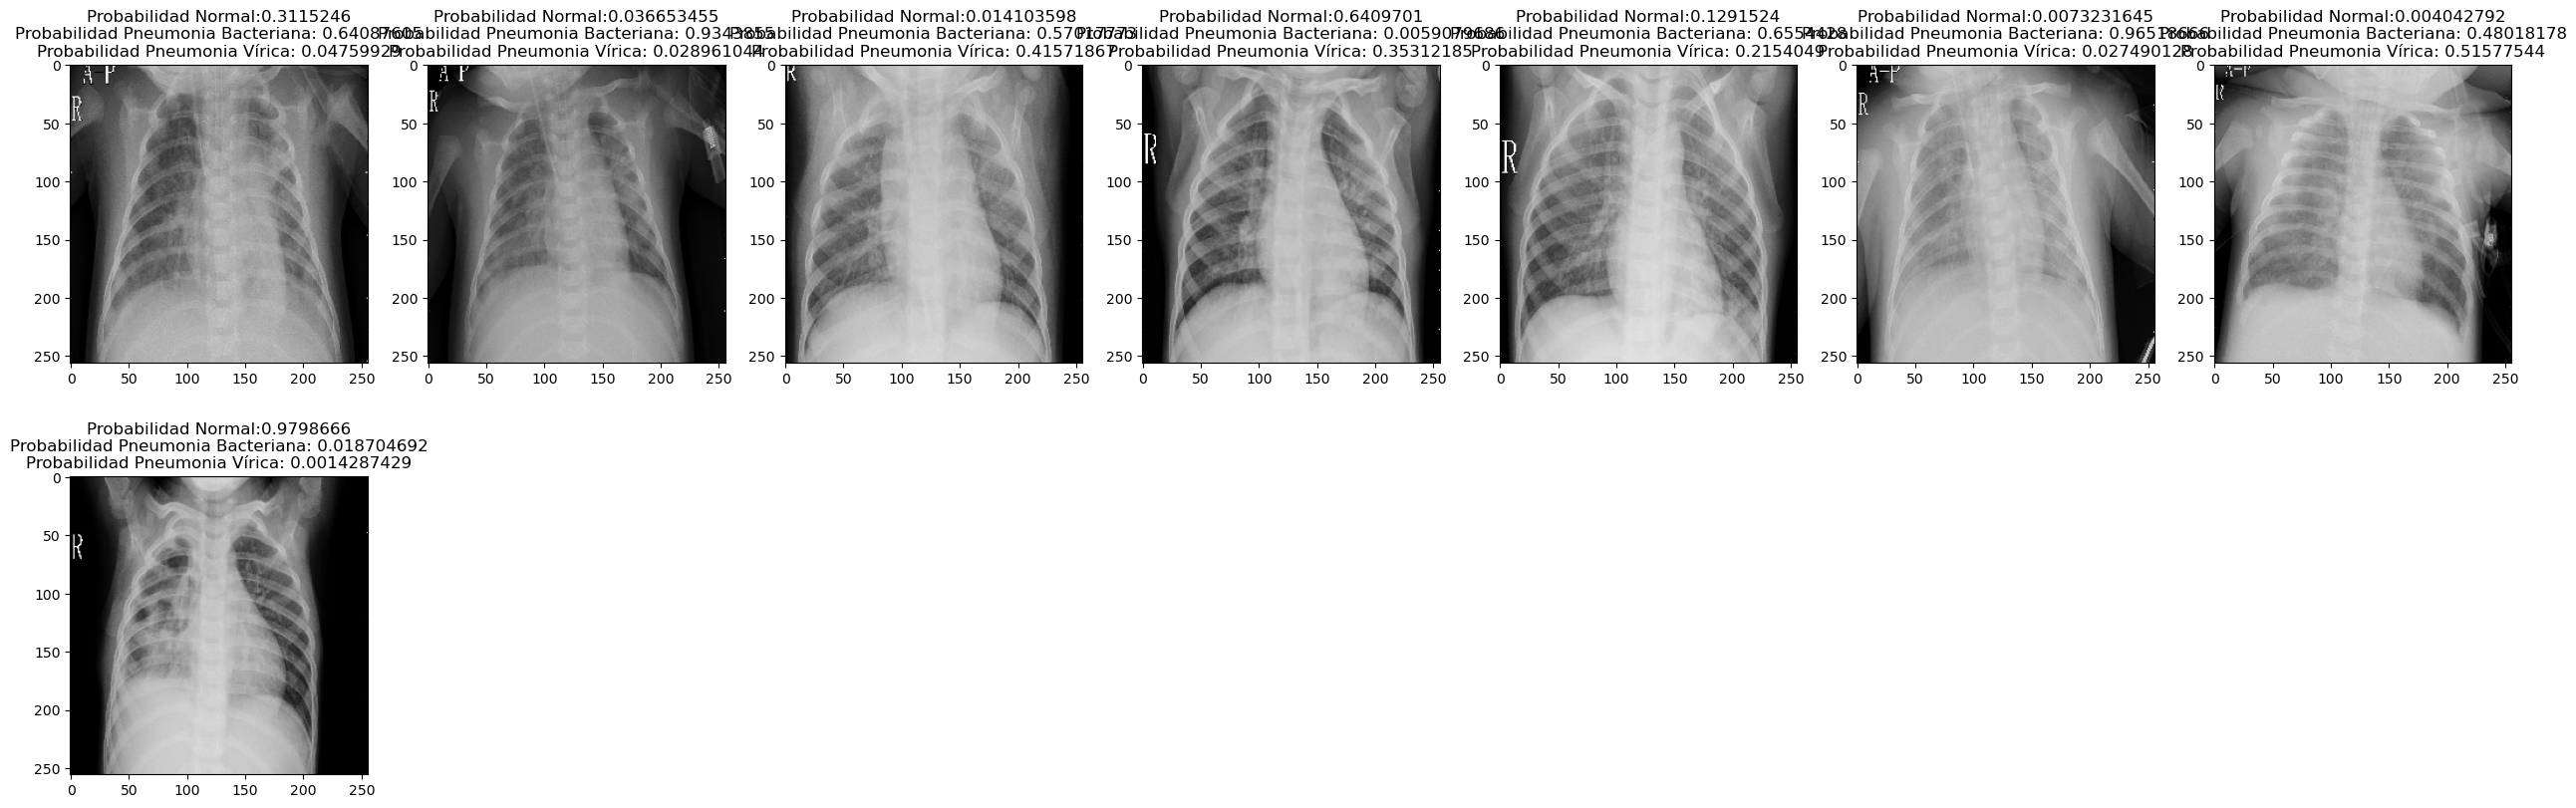

In [18]:
current_dir = os.getcwd()
i = 0
probs = []
plt.figure(figsize=(25, 8))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for file in os.listdir( current_dir + '/archive/chest_xray/chest_xray/val/PNEUMONIA_Bacteriana/'):
    plt.subplot(2, 7, i + 1)
    i = i+1
    img = load_img(current_dir + '/archive/chest_xray/chest_xray/val/PNEUMONIA_Bacteriana/' + file, target_size = (img_width, img_height), grayscale=True)  
    x = img_to_array(img)  
    img_batch = np.expand_dims(x, axis=0)
    prediction = model.predict(img_batch)
    plt.title(prediction)
    plt.title('Probabilidad Normal:' + str(prediction[0][0]) + '\nProbabilidad Pneumonia Bacteriana: ' + str(prediction[0][1]) + '\nProbabilidad Pneumonia Vírica: ' + str(prediction[0][2])) 
    plt.imshow(img, cmap='gray')

1/1 [==============================] - 0s 26ms/step


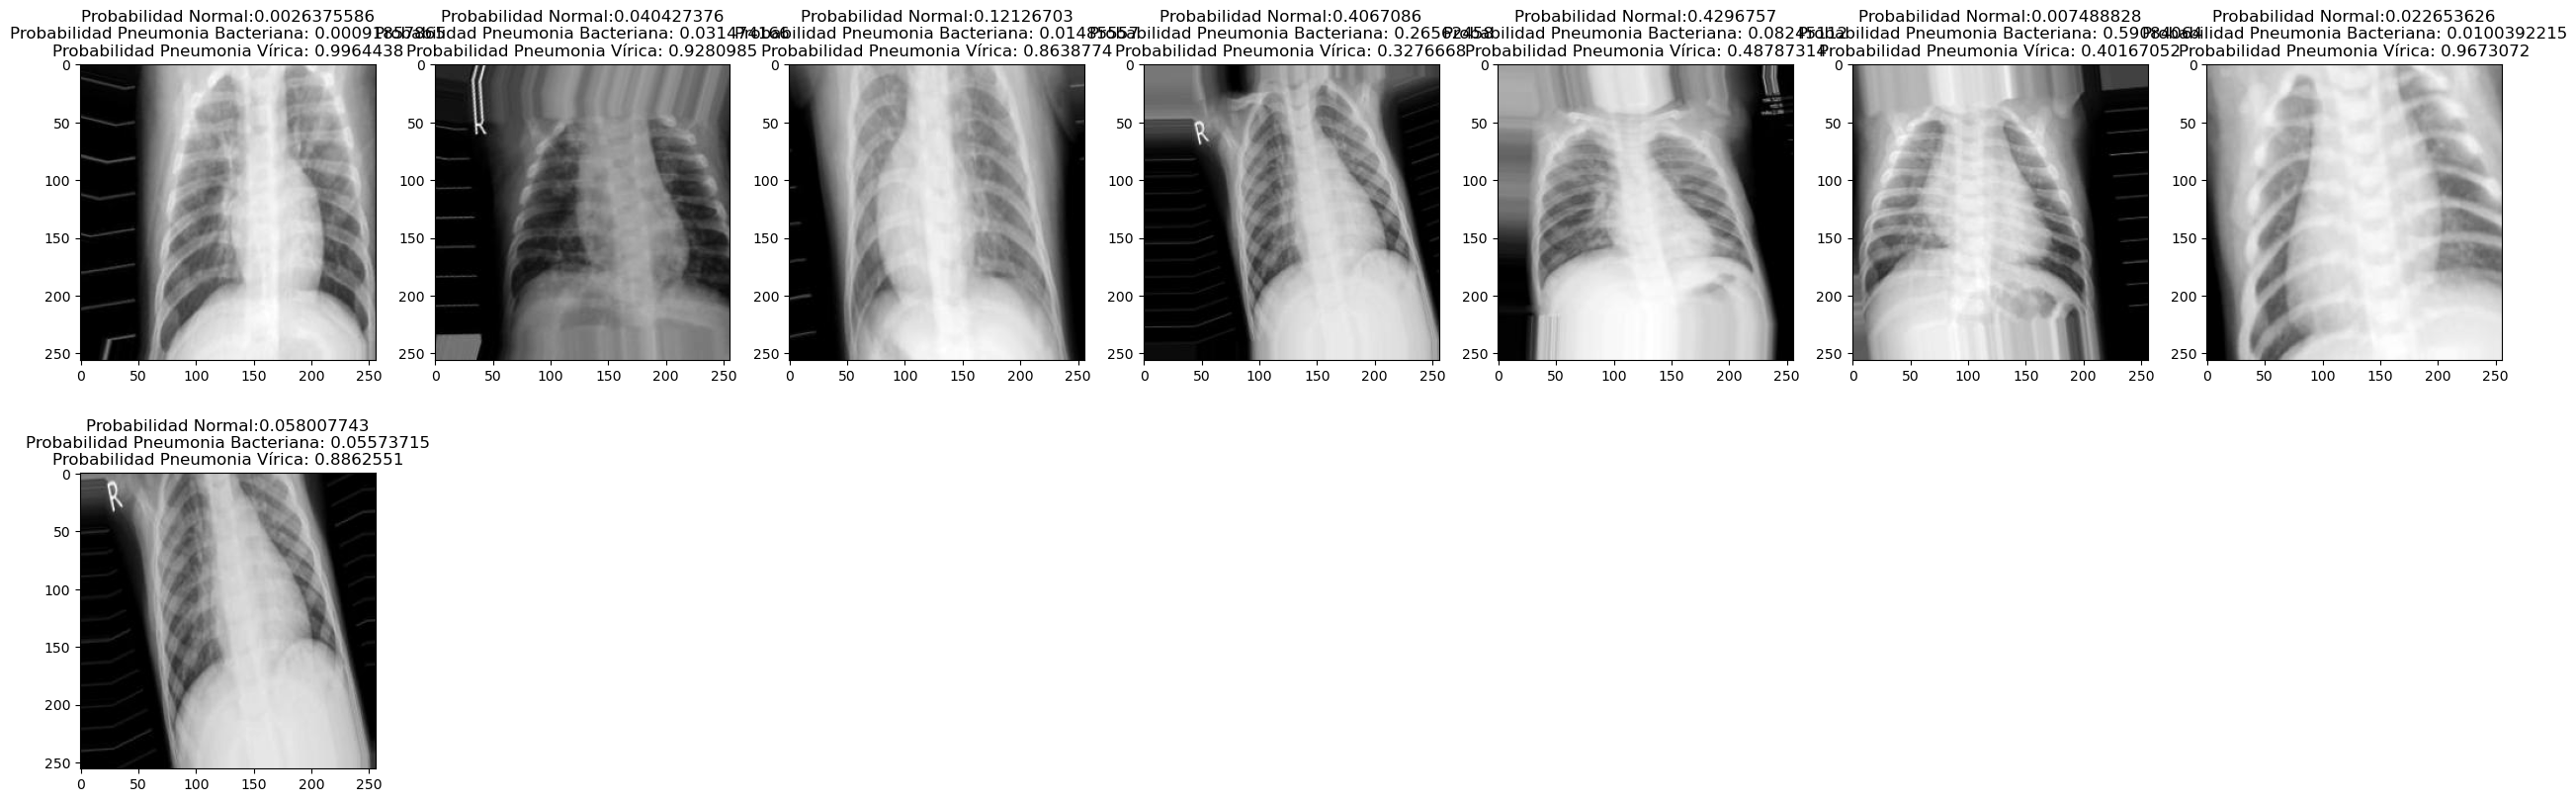

In [38]:
current_dir = os.getcwd()
i = 0
probs = []
plt.figure(figsize=(25, 8))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for file in os.listdir( current_dir + '/archive/chest_xray/chest_xray/val/PNEUMONIA_Virica/'):
    plt.subplot(2, 7, i + 1)
    i = i+1
    img = load_img(current_dir + '/archive/chest_xray/chest_xray/val/PNEUMONIA_Virica/' + file, target_size = (img_width, img_height), grayscale=True)  
    x = img_to_array(img)  
    img_batch = np.expand_dims(x, axis=0)
    prediction = model.predict(img_batch)
    plt.title(prediction)
    plt.title('Probabilidad Normal:' + str(prediction[0][0]) + '\nProbabilidad Pneumonia Bacteriana: ' + str(prediction[0][1]) + '\nProbabilidad Pneumonia Vírica: ' + str(prediction[0][2])) 
    plt.imshow(img, cmap='gray')